In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True)

In [14]:
data = df['data']
target = df['target']

In [16]:
data['class'] = target

In [19]:
data.shape

(150, 5)

In [17]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [21]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x203a9075820>,
 'caps': [<matplotlib.lines.Line2D at 0x203a9075f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x203a90755b0>],
 'medians': [<matplotlib.lines.Line2D at 0x203ab0ba6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x203ab0baa60>],
 'means': []}

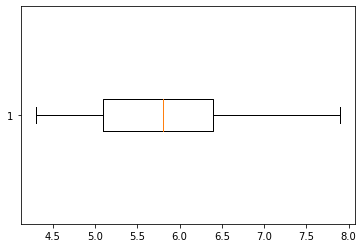

In [25]:
plt.boxplot(data['sepal length (cm)'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x203ab28fd30>,
 'caps': [<matplotlib.lines.Line2D at 0x203ab21f490>,
 'boxes': [<matplotlib.lines.Line2D at 0x203ab28f9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x203ab21fbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x203ab21ff40>],
 'means': []}

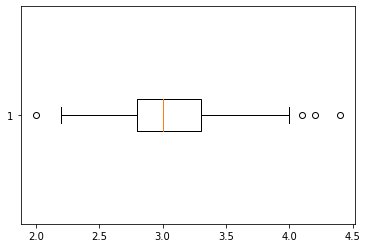

In [26]:
plt.boxplot(data['sepal width (cm)'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x203ab2006d0>,
 'caps': [<matplotlib.lines.Line2D at 0x203ab200df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x203ab200460>],
 'medians': [<matplotlib.lines.Line2D at 0x203ab1dd550>],
 'fliers': [<matplotlib.lines.Line2D at 0x203ab1dd8e0>],
 'means': []}

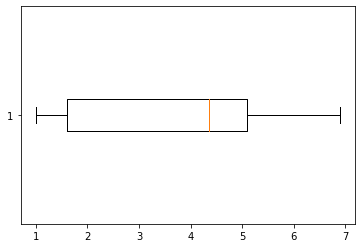

In [27]:
plt.boxplot(data['petal length (cm)'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x203ab2e0640>,
 'caps': [<matplotlib.lines.Line2D at 0x203ab2e0d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x203ab2e03d0>],
 'medians': [<matplotlib.lines.Line2D at 0x203ab2ea4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x203ab2ea850>],
 'means': []}

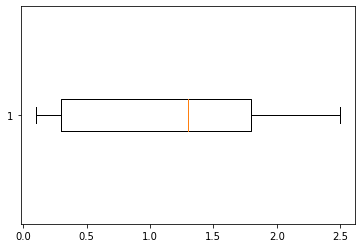

In [28]:
plt.boxplot(data['petal width (cm)'],vert = False)

In [29]:
data['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [30]:
data.groupby('class')['sepal length (cm)','petal length (cm)','sepal width (cm)','petal width (cm)'].agg(np.mean)

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
class,,,,
0,5.006,1.462,3.428,0.246
1,5.936,4.260,2.770,1.326
2,6.588,5.552,2.974,2.026


In [31]:
from sklearn.model_selection import train_test_split
x_cols = [col for col in data.columns if col !='class']
X = data[x_cols]
y = data['class']

In [32]:
X.shape

(150, 4)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=5)

In [39]:
y_test.value_counts()

2    6
1    5
0    4
Name: class, dtype: int64

In [40]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth = 5)

In [42]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [43]:
y_pred = dc.predict(X_test)

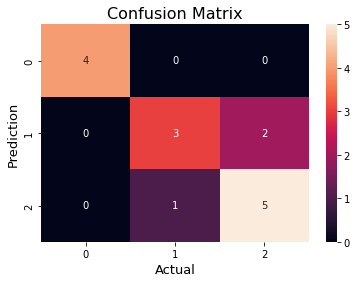

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,fmt='g',xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.75      0.60      0.67         5
           2       0.71      0.83      0.77         6

    accuracy                           0.80        15
   macro avg       0.82      0.81      0.81        15
weighted avg       0.80      0.80      0.80        15

